In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [16]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [17]:
data_generator = ImageDataGenerator(rescale=1./255,validation_split=0.1,width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [18]:
trainset='/content/drive/MyDrive/4loaibanh'

In [19]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 72 images belonging to 4 classes.
Found 7 images belonging to 4 classes.


In [20]:
validation_set.class_indices

{'banhdalon': 0, 'banhhoi': 1, 'banhuot': 2, 'banhxeo': 3}

In [25]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))

In [26]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_dataset,batch_size=128,epochs=100,verbose=1,validation_data=validation_set)

Epoch 1/100
1/1 [==============================] - 8s 8s/step - loss: 1.6226 - accuracy: 0.2361 - val_loss: 12.9638 - val_accuracy: 0.2857
Epoch 2/100
1/1 [==============================] - 5s 5s/step - loss: 12.1254 - accuracy: 0.3333 - val_loss: 6.9152 - val_accuracy: 0.1429
Epoch 3/100
1/1 [==============================] - 5s 5s/step - loss: 6.1316 - accuracy: 0.2500 - val_loss: 1.5104 - val_accuracy: 0.2857
Epoch 4/100
1/1 [==============================] - 6s 6s/step - loss: 1.6143 - accuracy: 0.2778 - val_loss: 1.2827 - val_accuracy: 0.5714
Epoch 5/100
1/1 [==============================] - 5s 5s/step - loss: 1.3942 - accuracy: 0.3611 - val_loss: 1.2182 - val_accuracy: 0.4286
Epoch 6/100
1/1 [==============================] - 5s 5s/step - loss: 1.2762 - accuracy: 0.3472 - val_loss: 1.1849 - val_accuracy: 0.4286
Epoch 7/100
1/1 [==============================] - 5s 5s/step - loss: 1.2049 - accuracy: 0.5000 - val_loss: 0.9400 - val_accuracy: 0.5714
Epoch 8/100
1/1 [===============

In [27]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 72 images belonging to 4 classes.
Found 7 images belonging to 4 classes.


In [28]:
model.save('4loaibanh.hs')

INFO:tensorflow:Assets written to: 4loaibanh.hs/assets


In [29]:
model1=load_model('4loaibanh.hs')

In [35]:
label = ['bánh da lợn','bánh hỏi','bánh ướt','bánh xèo']

bánh xèo


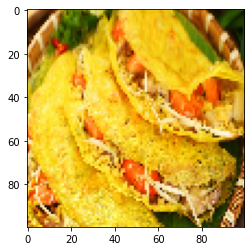

In [36]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/4loaibanh/banhxeo/bx1.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

banh hoi


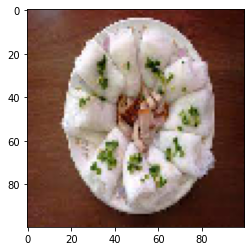

In [40]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/4loaibanh/banhhoi/bh1.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

banh uot


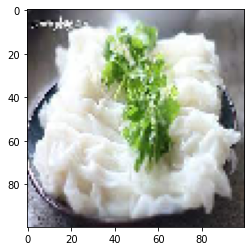

In [41]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/4loaibanh/banhuot/bu1.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

banh da lon


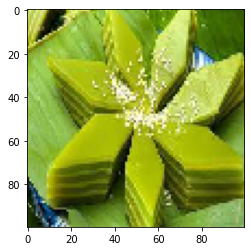

In [42]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/4loaibanh/banhdalon/b1.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])